<div style="background-color: #000080; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Lab COVID-19 Global Statistics - Exploratory Data Analysis
</h1>
</div>

In [18]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from scipy.stats.mstats import winsorize 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio

In [19]:
#Loading the dataset into a dataframe
df_raw=pd.read_csv("D:/INTERNSHIP/covid data analysis/COVID-19 Global Statistics Dataset.csv")
df=pd.read_csv("D:/INTERNSHIP/covid data analysis/COVID-19 Global Statistics Dataset.csv")
df_raw.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious_Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,111367209,NaN,1199031.0,NaN,109053249.0,NaN,1114929.0,1771.0,332633.0,3581.0,1.186743e+09,3544577.0,3.348053e+08
1,India,45028429,161.0,533475.0,2.0,NaN,NaN,NaN,NaN,32012.0,379.0,9.358795e+08,665334.0,1.406632e+09
2,France,40138560,NaN,167642.0,NaN,39970918.0,NaN,0.0,NaN,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38819284,574.0,182439.0,28.0,38240600.0,NaN,396245.0,NaN,462776.0,2175.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,38407327,NaN,709765.0,NaN,36249161.0,NaN,1448401.0,NaN,178345.0,3296.0,6.377617e+07,296146.0,2.153536e+08


In [20]:
#diplaying last 10 elements of the dataframe
df_raw.tail(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious_Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
229,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
230,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,NaN,347.0,4.0,160000000.0,110461.0,1.448471e+09
231,Total:,131413625,NaN,1674775.0,NaN,126866566.0,NaN,2872284.0,6926.0,NaN,NaN,NaN,NaN,NaN
232,Total:,221452228,161.0,1553005.0,2.0,205616782.0,583.0,14282441.0,14733.0,NaN,NaN,NaN,NaN,NaN
233,Total:,253186231,940.0,2100109.0,35.0,248509042.0,2477.0,2577080.0,4521.0,NaN,NaN,NaN,NaN,NaN
234,Total:,69791773,NaN,1365551.0,NaN,66648277.0,NaN,1777945.0,8953.0,NaN,NaN,NaN,NaN,NaN
235,Total:,14826780,1345.0,32665.0,NaN,14572565.0,NaN,221550.0,33.0,NaN,NaN,NaN,NaN,NaN
236,Total:,12859770,NaN,258884.0,NaN,12089899.0,NaN,510987.0,529.0,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15.0,NaN,706.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
238,Total:,703531128,2446.0,6985004.0,37.0,674303837.0,5178.0,22242287.0,35695.0,90256.5,896.1,NaN,NaN,NaN


In [21]:
#displaying sample 10 rows from the dataset
df_raw.sample(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious_Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
76,Paraguay,837602,NaN,20151.0,NaN,NaN,NaN,NaN,NaN,114648.0,2758.0,2657506.0,363751.0,7305843.0
107,Zimbabwe,266319,NaN,5737.0,NaN,258888.0,NaN,1694.0,12.0,17371.0,374.0,2525756.0,164744.0,15331428.0
144,Sudan,63993,NaN,5046.0,NaN,58947.0,NaN,0.0,NaN,1391.0,110.0,562941.0,12240.0,45992020.0
13,Vietnam,11624114,NaN,43206.0,NaN,10640971.0,NaN,939937.0,NaN,117470.0,437.0,85826548.0,867342.0,98953541.0
229,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
174,Timor-Leste,23460,NaN,138.0,NaN,23102.0,NaN,220.0,NaN,17131.0,101.0,278529.0,203391.0,1369429.0
157,Mayotte,42027,NaN,188.0,NaN,NaN,NaN,NaN,NaN,146815.0,657.0,176919.0,618038.0,286259.0
27,Malaysia,5274786,NaN,37347.0,NaN,5229308.0,NaN,8131.0,11.0,158970.0,1126.0,68580916.0,2066869.0,33181072.0
151,Andorra,48015,NaN,165.0,NaN,NaN,NaN,NaN,NaN,619844.0,2130.0,249838.0,3225256.0,77463.0
232,Total:,221452228,161.0,1553005.0,2.0,205616782.0,583.0,14282441.0,14733.0,NaN,NaN,NaN,NaN,NaN


In [22]:
#shape of the dataset
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 239 rows and 14 columns


In [23]:
#creating a new dataframe named df that contains data regarding only countrues (excluding 'Total' columns) from the df_raw dataframe
df=df_raw.loc[:230]
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious_Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,111367209,NaN,1199031.0,NaN,109053249.0,NaN,1114929.0,1771.0,332633.0,3581.0,1.186743e+09,3544577.0,3.348053e+08
1,India,45028429,161.0,533475.0,2.0,NaN,NaN,NaN,NaN,32012.0,379.0,9.358795e+08,665334.0,1.406632e+09
2,France,40138560,NaN,167642.0,NaN,39970918.0,NaN,0.0,NaN,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38819284,574.0,182439.0,28.0,38240600.0,NaN,396245.0,NaN,462776.0,2175.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,38407327,NaN,709765.0,NaN,36249161.0,NaN,1448401.0,NaN,178345.0,3296.0,6.377617e+07,296146.0,2.153536e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,NaN,NaN,NaN,NaN,NaN,80.0,NaN,58055.0,NaN,NaN,NaN,1.378000e+03
227,Vatican City,29,NaN,NaN,NaN,29.0,NaN,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02
228,Western Sahara,10,NaN,1.0,NaN,9.0,NaN,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05
229,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#number of null values in each column
df.isnull().sum()

Country               0
Total Cases           0
New Cases           223
Total Deaths          5
New Deaths          227
Total Recovered      49
New Recovered       217
Active Cases         48
Serious_Critical    179
Tot Cases/1M pop      2
Deaths/1M pop         7
Total Tests          18
Tests/1M pop         18
Population            2
dtype: int64

<Axes: >

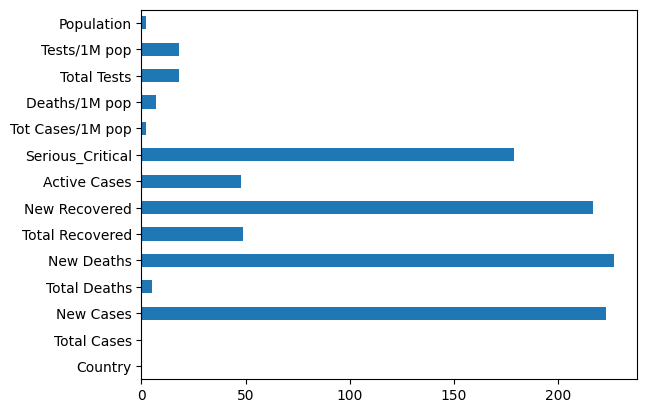

In [25]:
#bar plot of null values in each column
df.isna().sum().plot(kind='barh')

In [26]:
#checking for duplicate records
print(f'Total duplicate values: {df.duplicated().sum()}')

Total duplicate values: 0


In [27]:
#datatypes of each column
dataTypes = df.dtypes
dataTypes

Country              object
Total Cases           int64
New Cases           float64
Total Deaths        float64
New Deaths          float64
Total Recovered     float64
New Recovered       float64
Active Cases        float64
Serious_Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population          float64
dtype: object

In [28]:
#filling null values with 0 to help visualization and calculations
df.fillna({'New Cases':0,'New Deaths':0,'New Recovered':0,'Serious, Critical':0,'Total Deaths':0,'Total Recovered':0,'Active Cases':0,'Tot Cases/1M pop':0,'Deaths/1M pop':0,'Total Tests':0,'Tests/1M pop':0,'Population':0},inplace=True)
display(df['New Cases'].isnull().sum())

C:\Users\hp\AppData\Local\Temp\ipykernel_5936\4143502899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'New Cases':0,'New Deaths':0,'New Recovered':0,'Serious, Critical':0,'Total Deaths':0,'Total Recovered':0,'Active Cases':0,'Tot Cases/1M pop':0,'Deaths/1M pop':0,'Total Tests':0,'Tests/1M pop':0,'Population':0},inplace=True)


0

In [29]:
#checking data types after conversion
dataTypes = df.dtypes
dataTypes

Country              object
Total Cases           int64
New Cases           float64
Total Deaths        float64
New Deaths          float64
Total Recovered     float64
New Recovered       float64
Active Cases        float64
Serious_Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population          float64
dtype: object

In [30]:
#descriptive statistics of df
df.describe(include='all')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious_Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
count,231,2.310000e+02,231.000000,2.310000e+02,231.000000,2.310000e+02,231.000000,2.310000e+02,52.000000,231.000000,231.000000,2.310000e+02,2.310000e+02,2.310000e+02
unique,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.045589e+06,10.588745,3.023811e+04,0.160173,2.370657e+06,21.744589,2.639354e+04,72.653846,201035.142857,1237.376623,3.041125e+07,1.987570e+06,3.439366e+07
std,NaN,9.992410e+06,97.607286,1.082073e+05,1.887111,9.135559e+06,160.860457,1.412145e+05,249.879491,206006.008189,1307.719921,1.154192e+08,3.549645e+06,1.380709e+08
min,NaN,9.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2.606950e+04,0.000000,1.855000e+02,0.000000,1.767500e+03,0.000000,0.000000e+00,4.000000,17655.500000,133.500000,2.260585e+05,8.465900e+04,4.281115e+05
50%,NaN,2.068970e+05,0.000000,1.971000e+03,0.000000,5.457800e+04,0.000000,1.410000e+02,11.000000,128418.000000,783.000000,1.690934e+06,7.173800e+05,5.554960e+06
75%,NaN,1.347862e+06,0.000000,1.428700e+04,0.000000,1.020058e+06,0.000000,2.729000e+03,32.000000,327944.500000,2038.500000,1.163986e+07,2.126400e+06,2.183934e+07


## Overall situation analysis 

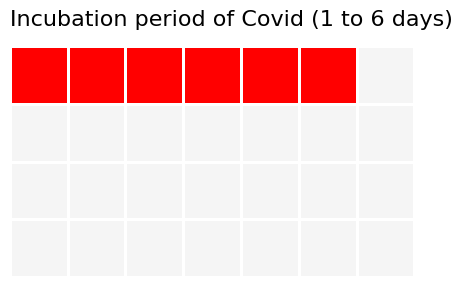

In [31]:
#covid incubation period

def plot_cal(title, start, end):
    '''Plot incubation period'''
    inc_day = []
    for i in range(1, 29):
        if(i>=start and i<=end):
            inc_day.append(1)
        else:
            inc_day.append(0)
            
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(4, 7)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax=sns.heatmap(inc_day, linewidths=2, square=True, 
                   xticklabels='', yticklabels='', ax=ax,
                   cbar=False, cmap=['whitesmoke','red'])
    ax.set_title(title, fontdict={'fontsize':16}, loc='left', pad=15)
    
    plt.show()
    
plot_cal('Incubation period of Covid (1 to 6 days)', 1, 6)

Text(0.5, 1.0, 'Top 10 Countries with highest number of Total Confirmed Cases')

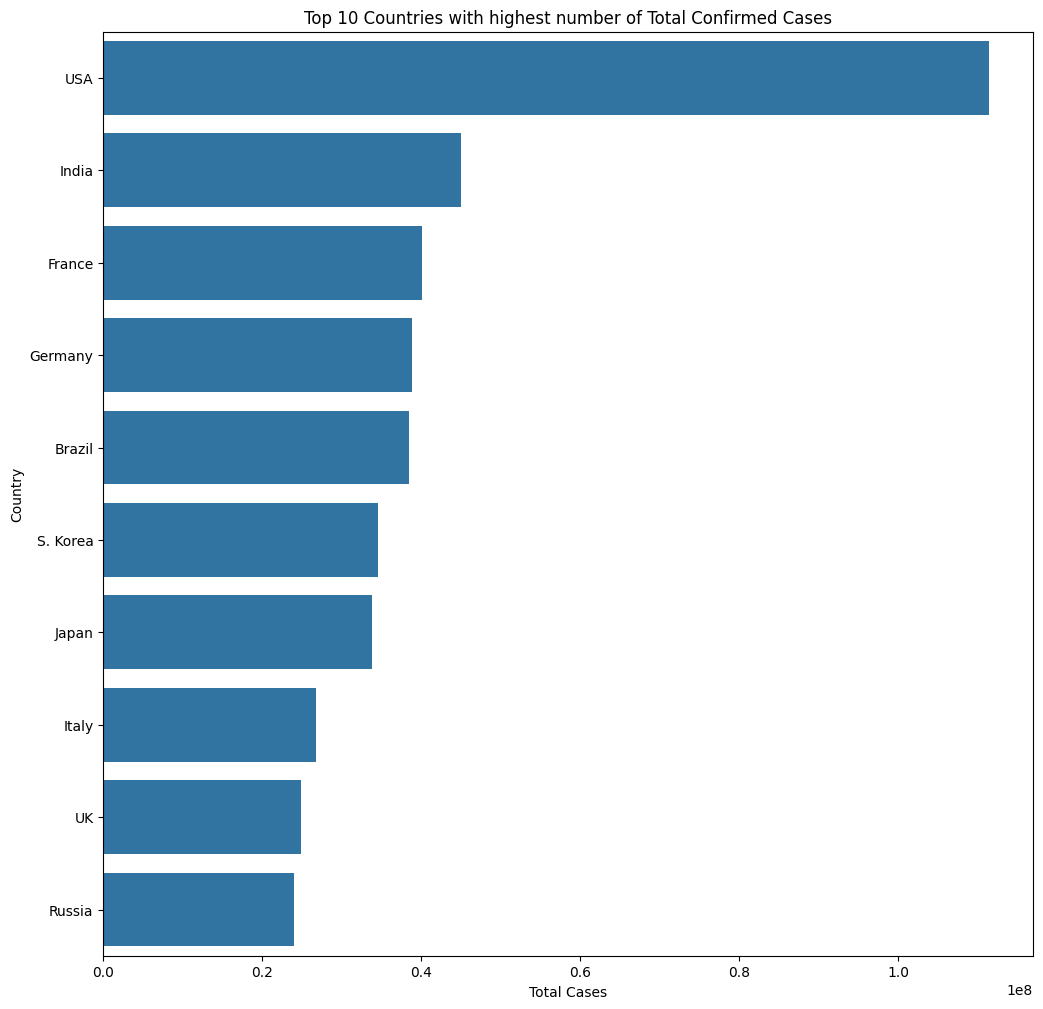

In [32]:
#Bar chart showing the top 10 Countries with highest number of Total Confirmed Cases
top_cases_df= df.sort_values('Total Cases',ascending = False).head(10)
top_cases_df = top_cases_df.drop(top_cases_df[top_cases_df['Country'] == 'Total:'].index)
plt.figure(figsize=(12,12))
ax=sns.barplot(y = 'Country',
            x = 'Total Cases',
            data = top_cases_df);

plt.title('Top 10 Countries with highest number of Total Confirmed Cases')

C:\Users\hp\AppData\Local\Temp\ipykernel_5936\1388977670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Recovered'] = df['Total Recovered'].fillna(df['Total Cases'] - df['Total Deaths'])


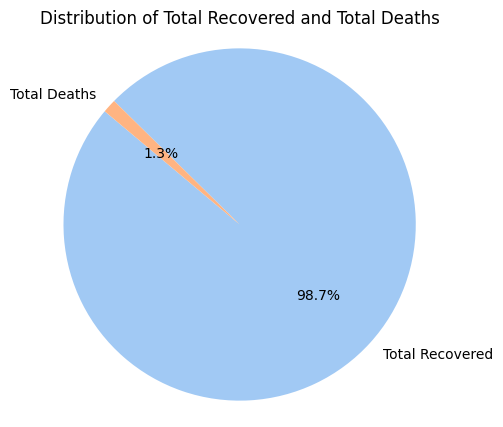

In [33]:
#filling in the null values of total recovered column
#plotting pie chart of total recovered vs total deaths
df['Total Recovered'] = df['Total Recovered'].fillna(df['Total Cases'] - df['Total Deaths'])

total_recovered = df['Total Recovered'].sum()
total_deaths = df['Total Deaths'].sum()

sizes = [total_recovered, total_deaths]
labels = ['Total Recovered', 'Total Deaths']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Distribution of Total Recovered and Total Deaths')
plt.show()

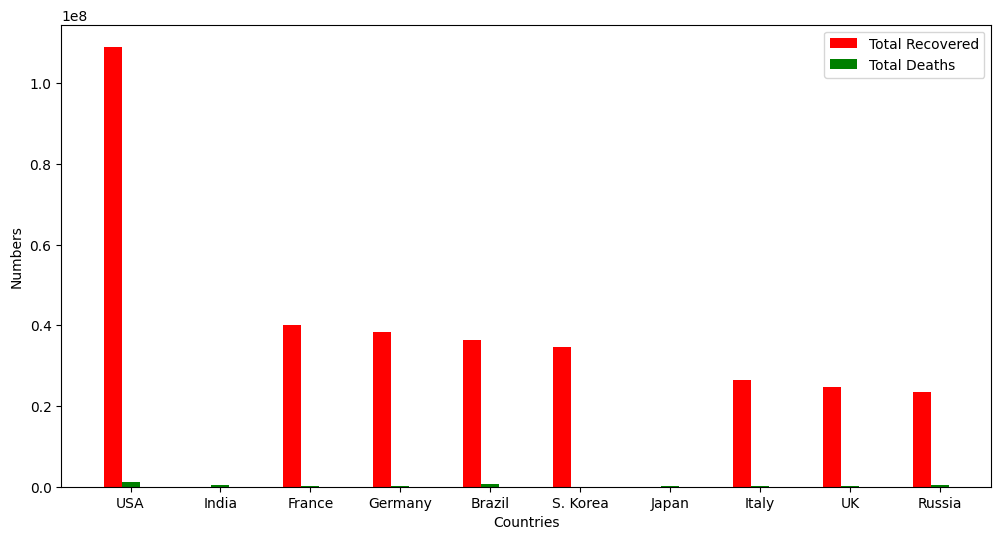

In [34]:
#bar plot of total recovered vs total deaths

plt.figure(figsize=(12, 6))

x=np.arange(10)
width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, df[:10]['Total Recovered'], width, color='red') 
plt.bar(x, df[:10]['Total Deaths'], width, color='green') 
plt.xticks(x, df[:10]['Country']) 
plt.xlabel("Countries") 
plt.ylabel("Numbers") 
plt.legend(["Total Recovered", "Total Deaths"]) 
plt.show() 

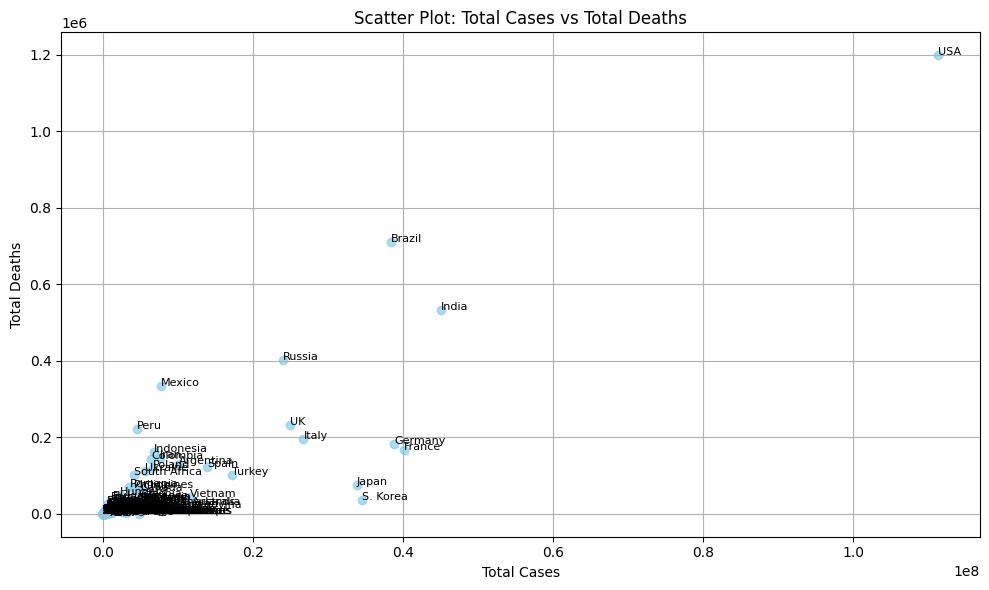

In [35]:
#scatter plot of total cases vs total deaths

# Sample data for demonstration
total_deaths = df['Total Deaths'].tolist()  # List of total deaths for each country
total_cases = df['Total Cases'].tolist()  # List of total cases for each country
country_names = df['Country'].tolist() # List of country names

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_cases, total_deaths, color='skyblue', alpha=0.7)

# Adding country names to the plot
for i, country in enumerate(country_names):
    plt.text(total_cases[i], total_deaths[i], country, fontsize=8)

# Setting plot labels and title
plt.title('Scatter Plot: Total Cases vs Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


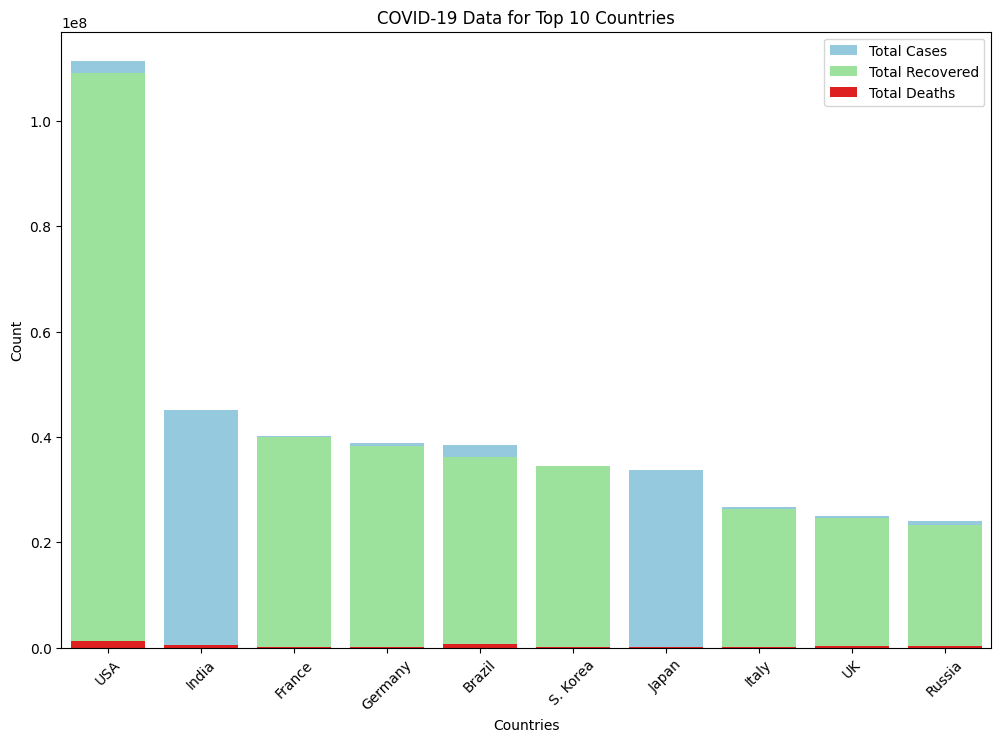

In [36]:
#composition bar chart of total cases, deaths and recovered
top_10_countries = df.nlargest(10, 'Total Cases')

plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Total Cases', data=top_10_countries, color='skyblue', label='Total Cases')
sns.barplot(x='Country', y='Total Recovered', data=top_10_countries, color='lightgreen', label='Total Recovered')
sns.barplot(x='Country', y='Total Deaths', data=top_10_countries, color='red', label='Total Deaths')

plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('COVID-19 Data for Top 10 Countries')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [37]:
#Top 20 Countries in view of Total Cases per 1 million
df1=df.sort_values('Tot Cases/1M pop',ascending=False)
fig = px.bar(df1.head(20), x='Country', y='Tot Cases/1M pop', color='Country')
fig.update_layout(template='gridon')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total Cases per 1 million",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.update_xaxes(tickangle=270)
fig.show()

## Population analysis

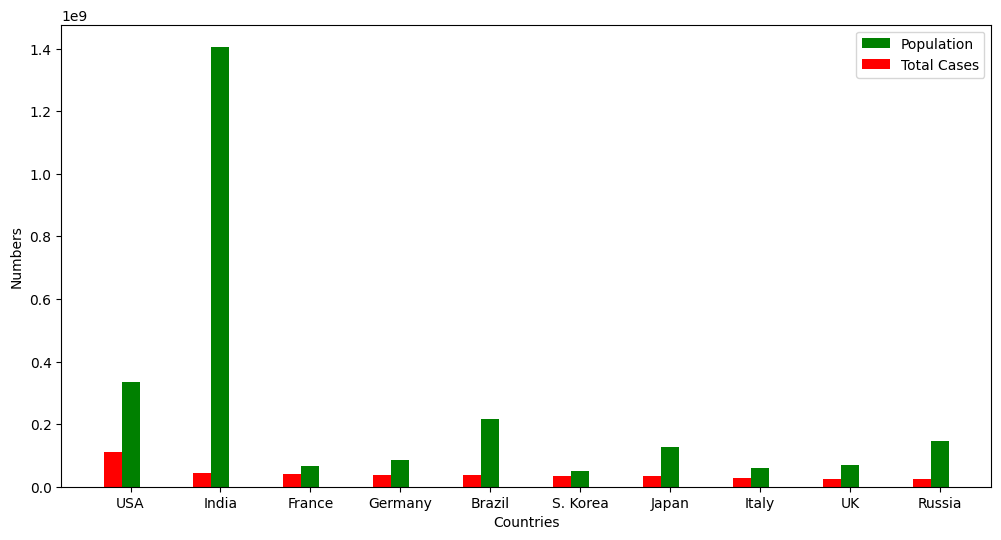

In [38]:
#population vs total cases chart
plt.figure(figsize=(12, 6))

x=np.arange(10)
width = 0.2
  
# plot data in grouped manner of bar type 

plt.bar(x, df[:10]['Population'], width, color='green') 
plt.bar(x-0.2, df[:10]['Total Cases'], width, color='red') 
#plt.bar(x+0.2,top_10_countries['Total Deaths'], width, color='green') 
plt.xticks(x, df[:10]['Country']) 
plt.xlabel("Countries") 
plt.ylabel("Numbers") 
plt.legend(["Population","Total Cases"]) 
plt.show() 

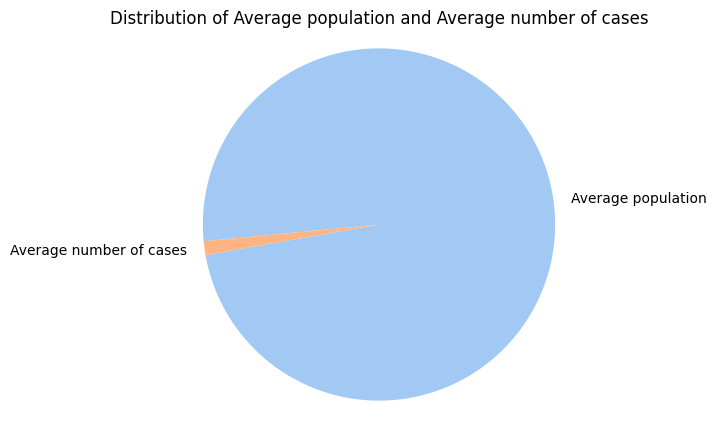

In [39]:
#pie chart of average population and average cases in the world
avg_population = df['Total Recovered'].mean()
avg_cases = df['Total Deaths'].mean()

sizes = [avg_population, avg_cases]
labels = ['Average population', 'Average number of cases']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels,  startangle=190, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Distribution of Average population and Average number of cases')
plt.show()

In [40]:
#dataframe sorted on the basis of population
df_pop=df.sort_values('Population',ascending=False)
df_pop

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious_Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
230,China,503302,0.0,5272.0,0.0,379053.0,0.0,118977.0,NaN,347.0,4.0,1.600000e+08,110461.0,1.448471e+09
1,India,45028429,161.0,533475.0,2.0,0.0,0.0,0.0,NaN,32012.0,379.0,9.358795e+08,665334.0,1.406632e+09
0,USA,111367209,0.0,1199031.0,0.0,109053249.0,0.0,1114929.0,1771.0,332633.0,3581.0,1.186743e+09,3544577.0,3.348053e+08
19,Indonesia,6828605,0.0,162033.0,0.0,6647104.0,0.0,19468.0,NaN,24463.0,580.0,1.141589e+08,408975.0,2.791345e+08
52,Pakistan,1581936,0.0,30664.0,0.0,1538689.0,0.0,12583.0,NaN,6893.0,134.0,3.058915e+07,133292.0,2.294890e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Niue,1055,0.0,0.0,0.0,1053.0,0.0,2.0,NaN,650432.0,0.0,0.000000e+00,0.0,1.622000e+03
226,Tokelau,80,0.0,0.0,0.0,0.0,0.0,80.0,NaN,58055.0,0.0,0.000000e+00,0.0,1.378000e+03
227,Vatican City,29,0.0,0.0,0.0,29.0,0.0,0.0,NaN,36295.0,0.0,0.000000e+00,0.0,7.990000e+02
225,Diamond Princess,712,0.0,13.0,0.0,699.0,0.0,0.0,NaN,0.0,0.0,0.000000e+00,0.0,0.000000e+00


In [41]:
#Top 10 countries with total number of cases vs population
fig = go.Figure()
fig.add_trace(go.Bar(x=df[:10].Country, y=df['Population'][:10],marker_color='green',name='Population'))
fig.add_trace(go.Bar(x=df[:10].Country, y=df['Total Cases'][:10],marker_color='red',name='Total Cases'))
fig.update_layout(template='simple_white')
fig.update_layout(title="Comparison between population and Total number of Cases",
                 xaxis_title = "Country Name", yaxis_title= "Population")
fig.show()

## Country centered analysis

In [42]:
#Top 10 populated countries vs total cases
fig = go.Figure()
fig.add_trace(go.Bar(x=df_pop[:10].Country, y=df_pop['Population'][:10],marker_color='green',name='Population'))
fig.add_trace(go.Bar(x=df_pop[:10].Country, y=df_pop['Total Cases'][:10],marker_color='red',name='Total Cases'))
fig.update_layout(template='simple_white')
fig.update_layout(title="Comparison between population and Total number of Cases",
                 xaxis_title = "Country Name", yaxis_title= "Population")
fig.show()

In [43]:
#Top 20 Countries in view of Total Cases
fig = px.bar(df.head(20), x='Country', y='Total Cases', color='Country')
fig.update_layout(template='presentation')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total Cases",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.update_xaxes(tickangle=270)
fig.show()

In [44]:
#Top 20 Countries in view of Total Deaths
df_deaths=df.sort_values(by=['Total Deaths'],ascending=False)
fig = px.bar(df_deaths.head(20), x='Country', y='Total Deaths',hover_data=['Total Deaths'], color='Country')
fig.update_layout(template='presentation')
fig.update_layout(title="Top 20 Countries in view of Total Deaths",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")

fig.update_xaxes(tickangle=270)
fig.show()

In [45]:
#Top 20 Countries in view of Total Recovered
df_recovered=df.sort_values('Total Recovered',ascending=False)
fig = px.bar(df_recovered.head(20), x='Country', y='Total Recovered', color='Country')
fig.update_layout(template='presentation')
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total Recovered",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.update_xaxes(tickangle=270)
fig.show()

In [46]:
df_test=df.sort_values('Total Tests',ascending=False)
fig = px.bar(df_test.head(20), x='Country', y='Total Tests', color='Country')
fig.update_layout(template='presentation')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total Tests",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.update_xaxes(tickangle=270)
fig.show()

## Testing efforts 

In [47]:
df1=df.sort_values('Deaths/1M pop',ascending=False)
fig = px.bar(df1.head(20), x='Country', y='Deaths/1M pop', color='Country')
fig.update_layout(template='presentation')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total deaths per 1 million",
                 xaxis_title= "Country Name",
                 yaxis_title= "Deaths/1M pop")
fig.update_xaxes(tickangle=270)
fig.show()

In [48]:
#Top 10 countries with total number of cases vs total number of tests
fig = go.Figure()
fig.add_trace(go.Bar(x=df[:10].Country, y=df['Total Tests'][:10],marker_color='green',name='Total Tests'))
fig.add_trace(go.Bar(x=df[:10].Country, y=df['Total Cases'][:10],marker_color='red',name='Total Cases'))
fig.update_layout(template='simple_white')
fig.update_layout(title="Comparison between Total Tests and Total number of Cases")
fig.show()

In [49]:
#Top 20 Countries in view of Total tests per 1 million
df1=df.sort_values('Tests/1M pop',ascending=False)
fig = px.bar(df1.head(20), x='Country', y='Tests/1M pop', color='Country')
fig.update_layout(template='plotly')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total tests per 1 million",
                 xaxis_title= "Country Name",
                 yaxis_title= "total tests")
fig.update_xaxes(tickangle=270)
fig.show()

In [50]:
#Bar Chart between cases and tests per 1 million
fig = go.Figure(data=[
    go.Bar(x=df[:10].Country, y=df['Tot Cases/1M pop'][:10], marker_color='#fcbd22', name='Tot Cases/1M pop'),
    go.Bar(x=df[:10].Country, y=df['Tests/1M pop'][:10], marker_color='#3f98b4', name='Tests/1M pop')
])
fig.update_layout(barmode='group')
fig.update_layout(template='simple_white')
fig.update_layout(title="A comparitive Bar Chart between cases and tests per 1 million",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.show()

In [51]:
#creating new dataframe with additional columns that represent different attribute rates
df_new=df.copy()
df_new['Test positivity rate']=df['Total Cases']/df['Total Tests']
df_new=df_new.sort_values('Test positivity rate',ascending=False)



df_new['Cases per population']=df['Total Cases']/df['Population']
df_new=df_new.sort_values('Cases per population',ascending=False)

df_new['Death rate']=df['Total Deaths']/df['Total Cases']
df_new=df_new.sort_values('Death rate',ascending=False)

df_new['Test rate']=df['Total Tests']/df['Population']
df_new=df_new.sort_values('Test rate',ascending=False)

df_new['Recovery rate']=df['Total Recovered']/df['Total Cases']
df_new=df_new.sort_values('Recovery rate',ascending=False)


df_new.replace([np.inf], 0, inplace=True)

df_new

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious_Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Test positivity rate,Cases per population,Death rate,Test rate,Recovery rate
227,Vatican City,29,0.0,0.0,0.0,29.0,0.0,0.0,NaN,36295.0,0.0,0.0,0.0,799.0,0.000000,0.036295,0.000000,0.000000,1.000000
222,Falkland Islands,1930,0.0,0.0,0.0,1930.0,0.0,0.0,NaN,545352.0,0.0,8632.0,2439107.0,3539.0,0.223587,0.545352,0.000000,2.439107,1.000000
31,DPRK,4772813,0.0,74.0,0.0,4772739.0,0.0,0.0,NaN,183636.0,3.0,0.0,0.0,25990679.0,0.000000,0.183636,0.000016,0.000000,0.999984
5,S. Korea,34571873,0.0,35934.0,0.0,34535939.0,0.0,0.0,NaN,673523.0,700.0,15804065.0,307892.0,51329899.0,2.187530,0.673523,0.001039,0.307892,0.998961
188,Marshall Islands,16138,0.0,17.0,0.0,16121.0,0.0,0.0,NaN,268711.0,283.0,0.0,0.0,60057.0,0.000000,0.268711,0.001053,0.000000,0.998947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Kuwait,667026,0.0,2570.0,0.0,0.0,0.0,0.0,NaN,152278.0,587.0,8455743.0,1930391.0,4380326.0,0.078884,0.152278,0.003853,1.930391,0.000000
206,Sierra Leone,7779,0.0,126.0,0.0,0.0,0.0,0.0,NaN,937.0,15.0,259958.0,31296.0,8306436.0,0.029924,0.000937,0.016197,0.031296,0.000000
132,Malawi,89168,0.0,2686.0,0.0,0.0,0.0,0.0,NaN,4418.0,133.0,624784.0,30959.0,20180839.0,0.142718,0.004418,0.030123,0.030959,0.000000
10,Turkey,17232066,0.0,102174.0,0.0,0.0,0.0,0.0,NaN,201399.0,1194.0,162743369.0,1902052.0,85561976.0,0.105885,0.201399,0.005929,1.902052,0.000000


In [52]:
#Test positivity rate graph of top 20 countries
df_sort=df_new.sort_values('Test positivity rate',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Test positivity rate', color='Country')
fig.update_layout(template='plotly')
fig.update_layout(title="Top 20 Countries in view of Test positivity rate",
                 xaxis_title= "Country Name",
                 yaxis_title= "Test positivity rate")
fig.update_xaxes(tickangle=270)
fig.show()

In [53]:
#Top 20 Countries in view of Cases per population
df_sort=df_new.sort_values('Cases per population',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Cases per population', color='Country')
fig.update_layout(template='plotly')
fig.update_layout(title="Top 20 Countries in view of Cases per population",
                 xaxis_title= "Country Name",
                 yaxis_title= "Cases per population")
fig.update_xaxes(tickangle=270)
fig.show()

In [54]:
#Top 20 Countries in view of death rate
df_sort=df_new.sort_values('Death rate',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Death rate', color='Country')
fig.update_layout(template='seaborn')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of death rate",
                 yaxis_title= "Death rate")
fig.update_xaxes(tickangle=270)
fig.show()

In [55]:
#Top 20 Countries in view of Test rate
df_sort=df_new.sort_values('Test rate',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Test rate', color='Country')
fig.update_layout(template='ggplot2')
fig.update_layout(title="Top 20 Countries in view of Test rate",
                 xaxis_title= "Country Name",
                 yaxis_title= "Test rate")
fig.update_xaxes(tickangle=270)
fig.show()

In [56]:
#Top 20 Countries in view of recovery rate
df_sort=df_new.sort_values('Recovery rate',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Recovery rate', color='Country')
fig.update_layout(template='plotly')
fig.update_layout(title="Top 20 Countries in view of recovery rate",
                 xaxis_title= "Country Name",
                 yaxis_title= "Recovery rate")
fig.update_xaxes(tickangle=270)
fig.show()

## Region/ country comparison

In [57]:
import plotly.graph_objs as go
import plotly.io as pio

# You may need to download the world choropleth map
pio.templates.default = "plotly"
world_map = go.Figure(go.Choropleth(
    locations = df['Country'],
    z = df['Total Cases'],
    locationmode = 'country names',
    colorscale = 'Blues',
    colorbar_title = 'Total',
))

world_map.update_layout(
    title_text = 'Total COVID-19 Cases by Country',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)
world_map.show()


In [58]:
#Total COVID-19 Tests conducted by Country

pio.templates.default = "plotly"
world_map = go.Figure(go.Choropleth(
    locations = df['Country'],
    z = df['Tests/1M pop'],
    locationmode = 'country names',
    colorscale = 'Greens',
    colorbar_title = 'Total',
))

world_map.update_layout(
    title_text = 'Total COVID-19 Tests conducted by Country',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)
world_map.show()


In [59]:
# Total COVID-19 deaths by Country
pio.templates.default = "plotly"
world_map = go.Figure(go.Choropleth(
    locations = df['Country'],
    z = df['Total Deaths'],
    locationmode = 'country names',
    colorscale = 'Reds',
    colorbar_title = 'Total',
))

world_map.update_layout(
    title_text = 'Total COVID-19 deaths by Country',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)
world_map.show()


## Correlation and prediction

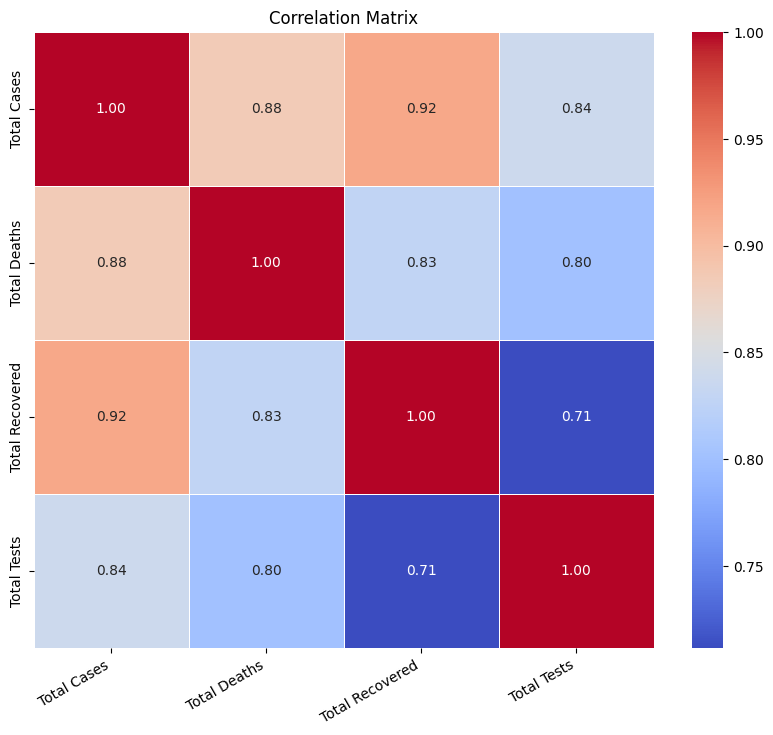

In [60]:
# Assign the columns
columns_of_interest = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Total Tests']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

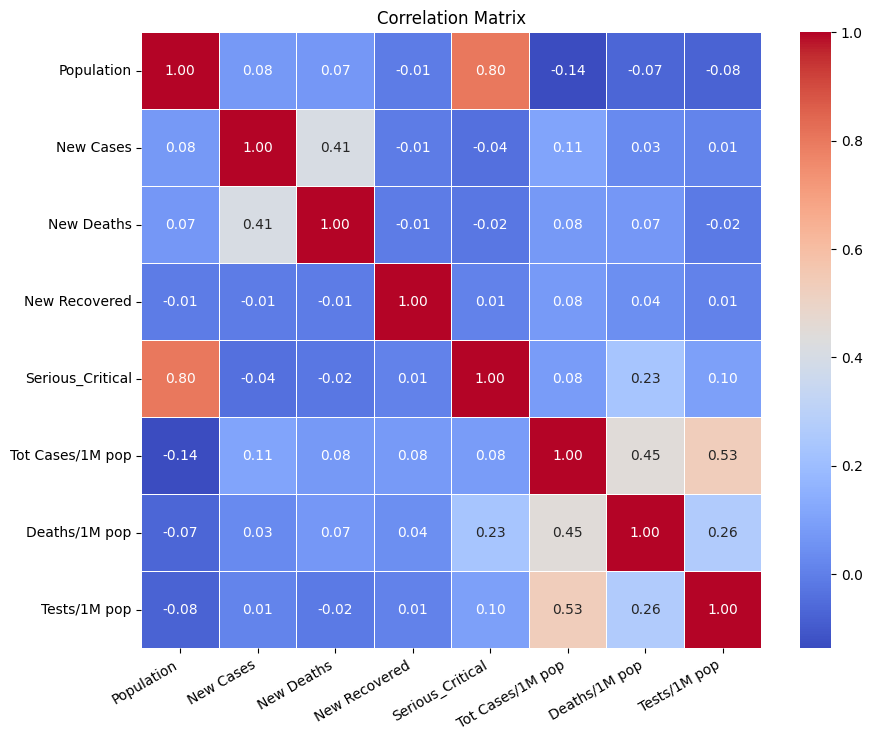

In [63]:
# Assign the columns
columns_of_interest = ['Population','New Cases','New Deaths','New Recovered','Serious_Critical','Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

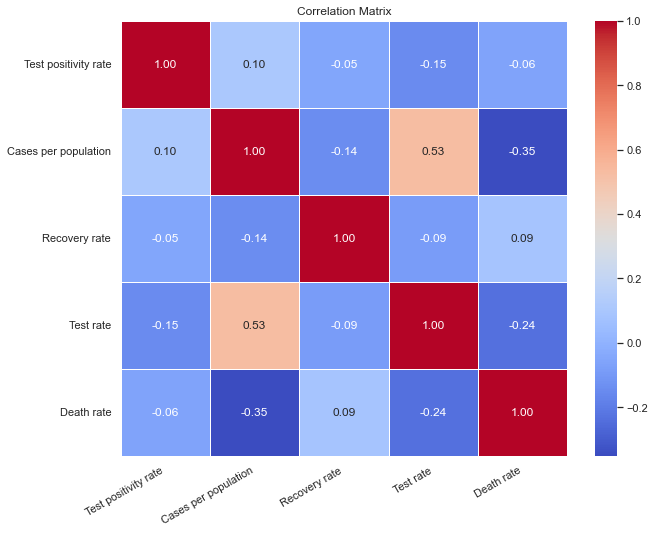

In [ ]:
#correlation
columns_of_interest = ['Test positivity rate', 'Cases per population', 'Recovery rate', 'Test rate','Death rate']

# Calculate the correlation matrix
correlation_matrix = df_new[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

<AxesSubplot:title={'center':'Global Heatmap [Scaled by 1e^6, descending by pop.]'}, ylabel='Country'>

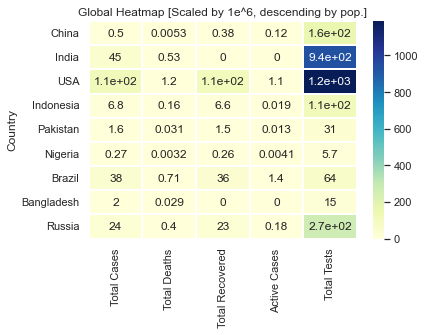

In [ ]:
#correlation
heatmap = df
heatmap = heatmap.set_index('Country')
heatmap = heatmap.sort_values('Population',ascending=False)[0:9]
heatmap = heatmap.drop(['Population','New Cases','New Deaths','New Recovered','Serious, Critical','Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop'],axis=1)
heatmap = heatmap * .000001
plt.xlabel('Category')
plt.ylabel('Country')
plt.title('Global Heatmap [Scaled by 1e^6, descending by pop.]')
sns.heatmap(heatmap, cmap='YlGnBu',annot=True,linewidths=2)